In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('drive/MyDrive/Datasets/Sentiment_analysis/CoronaTweetsSentimentAnalysis.csv')

data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive
...,...,...,...,...,...,...
1983,1984,48737,Paraparaumu Beach,16-03-2020,Just been through K?piti New World which is bu...,Positive
1984,1985,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive
1985,1986,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
1986,1987,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive


In [4]:
#Since, we'll only consider the review content for sentiment analysis all the others are not needed

mod_data = data[['OriginalTweet', 'Sentiment']]

mod_data

,OriginalTweet,Sentiment
0,When I couldn't find hand sanitizer at Fred Me...,Positive
1,#Panic buying hits #NewYork City as anxious sh...,Negative
2,Voting in the age of #coronavirus = hand sanit...,Positive
3,Best quality couches at unbelievably low price...,Positive
4,While we were busy watching election returns a...,Positive
...,...,...
1983,Just been through K?piti New World which is bu...,Positive
1984,"Even though the Law Library is closed, ALL sub...",Positive
1985,"@RicePolitics @MDCounties Craig, will you call...",Negative
1986,Meanwhile In A Supermarket in Israel -- People...,Positive


In [5]:
mod_data.shape

(1988, 2)

In [6]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  1988 non-null   object
 1   Sentiment      1988 non-null   object
dtypes: object(2)
memory usage: 31.2+ KB


In [7]:
mod_data.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

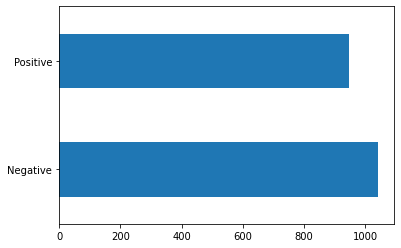

In [8]:
mod_data['Sentiment'].value_counts()[:2].plot(kind='barh')

In [9]:
X = mod_data['OriginalTweet'].copy()

X

0       When I couldn't find hand sanitizer at Fred Me...
1       #Panic buying hits #NewYork City as anxious sh...
2       Voting in the age of #coronavirus = hand sanit...
3       Best quality couches at unbelievably low price...
4       While we were busy watching election returns a...
                              ...                        
1983    Just been through K?piti New World which is bu...
1984    Even though the Law Library is closed, ALL sub...
1985    @RicePolitics @MDCounties Craig, will you call...
1986    Meanwhile In A Supermarket in Israel -- People...
1987    Did you panic buy a lot of non-perishable item...
Name: OriginalTweet, Length: 1988, dtype: object

In [10]:
X[1]

'#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu'

In [11]:
import nltk 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
import re

for i in range(0, len(X)):
  words = X[i]
  words = re.sub(r"[^a-zA-Z0-9' ']","",words)

  words = words.split()  
  for x in range(len(words)):
      if "https" in words[x]:
          words = words[:x]
          break

  word = []
  for j in words:
    if j not in stop_words:
        word.append(j+" ")
  
  X[i] = ''.join(word)

In [14]:
X[1]

'Panic buying hits NewYork City anxious shoppers stock foodampmedical supplies healthcare worker 30s becomes BigApple 1st confirmed coronavirus patient OR Bloomberg staged '

In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [16]:
from nltk.stem import WordNetLemmatizer

lmt = WordNetLemmatizer()

for i in range(len(X)):
    words = X[i].split()
    word = []
    for w in words:
        w = w.lower()
        mod_w = lmt.lemmatize(w, pos="v")
        word.append(mod_w+" ")
    
    X[i] = ''.join(word)

In [17]:
X

0       when i find hand sanitizer fred meyer i turn a...
1       panic buy hit newyork city anxious shoppers st...
2       vote age coronavirus hand sanitizer supertuesday 
3       best quality couch unbelievably low price avai...
4       while busy watch election return brace covid19...
                              ...                        
1983    just kpiti new world busy staff say way since ...
1984    even though law library close all subscribers ...
1985    ricepolitics mdcounties craig call general ass...
1986    meanwhile in a supermarket israel people dance...
1987    do panic buy lot nonperishable items echo need...
Name: OriginalTweet, Length: 1988, dtype: object

In [18]:
for i in range(len(X)):
    X[i] = X[i].split()

X

0       [when, i, find, hand, sanitizer, fred, meyer, ...
1       [panic, buy, hit, newyork, city, anxious, shop...
2       [vote, age, coronavirus, hand, sanitizer, supe...
3       [best, quality, couch, unbelievably, low, pric...
4       [while, busy, watch, election, return, brace, ...
                              ...                        
1983    [just, kpiti, new, world, busy, staff, say, wa...
1984    [even, though, law, library, close, all, subsc...
1985    [ricepolitics, mdcounties, craig, call, genera...
1986    [meanwhile, in, a, supermarket, israel, people...
1987    [do, panic, buy, lot, nonperishable, items, ec...
Name: OriginalTweet, Length: 1988, dtype: object

In [19]:
from gensim.models import Word2Vec, Phrases

w2v_model = Word2Vec(sentences = X,size = 100,window=5,min_count=1)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM,SimpleRNN, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras import optimizers

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [22]:
X = tokenizer.texts_to_sequences(X)

In [23]:
pad_len = 150
X = pad_sequences(X,maxlen=pad_len)

In [24]:
X

array([[   0,    0,    0, ...,  181,  367,   16],
       [   0,    0,    0, ...,  479, 2817, 1927],
       [   0,    0,    0, ...,   40,  152, 2818],
       ...,
       [   0,    0,    0, ..., 7704,  239, 1139],
       [   0,    0,    0, ...,   48,  519,    3],
       [   0,    0,    0, ...,  872,  169,    1]], dtype=int32)

In [25]:
# Mappings
indexes = tokenizer.word_index
for word,num in indexes.items():
    print(f"{num} --> {word}")
    if num == 30:
        break

1 --> covid19
2 --> food
3 --> coronavirus
4 --> store
5 --> i
6 --> stock
7 --> grocery
8 --> people
9 --> go
10 --> shop
11 --> get
12 --> buy
13 --> supermarket
14 --> amp
15 --> online
16 --> price
17 --> panic
18 --> need
19 --> like
20 --> toilet
21 --> paper
22 --> the
23 --> time
24 --> work
25 --> supply
26 --> local
27 --> home
28 --> take
29 --> us
30 --> demand


In [26]:
vocab_size = len(tokenizer.word_index) + 1

In [27]:
Y = mod_data['Sentiment']

Y

0       Positive
1       Negative
2       Positive
3       Positive
4       Positive
          ...   
1983    Positive
1984    Positive
1985    Negative
1986    Positive
1987    Negative
Name: Sentiment, Length: 1988, dtype: object

In [28]:
#label encoding for label class
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
Y = label_encoder.fit_transform(Y)

Y

array([1, 0, 1, ..., 0, 1, 0])

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
print(X_train.shape)
print(Y_train.shape)

(1590, 150)
(1590,)


In [31]:
print(X_train[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2053 2416  446
 2490  986   72   57    7    4   35   72   47    1]


In [32]:
len(w2v_model.wv.vocab)

7706

In [33]:
import numpy as np

weight_matrix = np.zeros((vocab_size,100))
for word,i in indexes.items():
    weight_matrix[i] = w2v_model.wv[word]

In [34]:
print(X_train.shape)

(1590, 150)


In [35]:
print(Y_train.shape)

(1590,)


In [36]:
print(Y_train[1])

0


In [49]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=100,weights = [weight_matrix], 
                    input_length = pad_len,trainable = False))

model.add(LSTM(units=100))
model.add(Dropout(0.3))

model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          770700    
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 851,201
Trainable params: 80,501
Non-trainable params: 770,700
_________________________________________________________________


In [50]:
adam=optimizers.Adam(learning_rate=0.08)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [51]:
history=model.fit(X_train,Y_train,epochs=50, batch_size = 20, validation_split=0.1)

Epoch 1/50
72/72 [==============================] - 10s 107ms/step - loss: 0.8260 - accuracy: 0.5003 - val_loss: 0.6801 - val_accuracy: 0.5535
Epoch 2/50
72/72 [==============================] - 7s 101ms/step - loss: 0.7147 - accuracy: 0.5241 - val_loss: 0.7246 - val_accuracy: 0.4717
Epoch 3/50
72/72 [==============================] - 7s 102ms/step - loss: 0.7134 - accuracy: 0.5122 - val_loss: 0.7618 - val_accuracy: 0.4465
Epoch 4/50
72/72 [==============================] - 7s 102ms/step - loss: 0.7070 - accuracy: 0.4997 - val_loss: 0.6825 - val_accuracy: 0.5535
Epoch 5/50
72/72 [==============================] - 7s 101ms/step - loss: 0.7108 - accuracy: 0.4731 - val_loss: 0.6995 - val_accuracy: 0.5094
Epoch 6/50
72/72 [==============================] - 7s 101ms/step - loss: 0.7020 - accuracy: 0.5129 - val_loss: 0.6895 - val_accuracy: 0.5283
Epoch 7/50
72/72 [==============================] - 7s 101ms/step - loss: 0.6973 - accuracy: 0.5150 - val_loss: 0.6922 - val_accuracy: 0.5535
Epoch

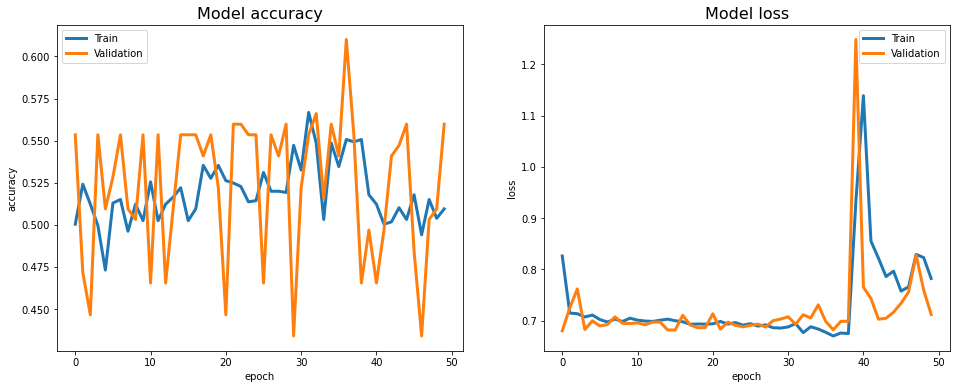

In [52]:
# summarize history for accuracy
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

axis1.plot(history.history['accuracy'], label='Train', linewidth=3)
axis1.plot(history.history['val_accuracy'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='upper left')

# summarize history for loss
axis2.plot(history.history['loss'], label='Train', linewidth=3)
axis2.plot(history.history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
plt.show()

In [53]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 50ms/step - loss: 0.7957 - accuracy: 0.5000


[0.7956815958023071, 0.5]

In [57]:
X_test[0].shape

(150,)

In [64]:
sin_test_shape = X_test[0].shape[0]

sin_test_shape

150

In [67]:
prediction = model.predict(X_test[0].reshape(X_test[0].shape[0],1))

print("Prediction: %.2f"%prediction[0],"Actual:",Y_test[0])

Prediction: 0.71 Actual: 0
